In [1]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_data = pd.read_csv("dida_posey_to_predict.csv", index_col=0)
df_data.head()

,CADD1,CADD2,RecA,EssA,CADD3,CADD4,RecB,EssB,Path,DE,Pair
ID,,,,,,,,,,,
dd001,4.301835,-1.0,0.34,0.0,3.594566,-1.0,0.30,1.0,1,CO,KCNQ1/KCNH2
dd002,-0.106983,-1.0,0.16,1.0,5.409467,-1.0,0.51,1.0,1,TD,GJB3/GJB2
dd003,-0.724535,-1.0,0.16,1.0,5.409467,-1.0,0.51,1.0,1,TD,GJB3/GJB2
dd004,-0.724535,-1.0,0.16,1.0,4.711890,-1.0,0.51,1.0,1,TD,GJB3/GJB2
dd005,-1.701666,-1.0,0.20,1.0,2.796133,-1.0,0.44,0.0,0,TD,FOXI1/SLC26A4


In [14]:
X = array(df_data.drop(['DE', 'Pair'], 1))
X_reduced = X[:,[0,4]]
y = df_data['DE']

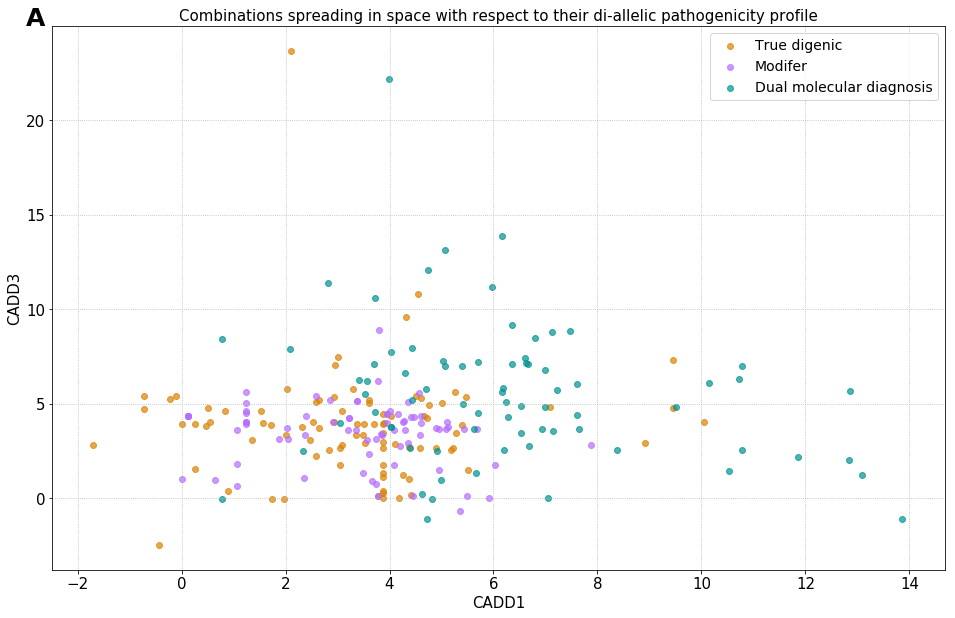

In [6]:
figure( figsize=(16, 10) )

text(-3, 25, 'A', fontsize=25, weight='bold')

x_t, x_u, x_c, x_d = X_reduced[y == "TD"], X_reduced[y == "UK"], X_reduced[y == "CO"], X_reduced[y == "DD"]

scatter(x_t[:,0], x_t[:,1], marker="o", color=(219/255, 130/255, 0/255, 0.7), label="True digenic")
scatter(x_c[:,0], x_c[:,1], marker="o", color=(182/255, 109/255, 255/255, 0.7), label="Modifer")
#scatter(x_u[:,0], x_u[:,1], marker="o", color="silver", label="Unknown")
scatter(x_d[:,0], x_d[:,1], marker="o", color=(0/255, 146/255, 146/255, 0.7), label="Dual molecular diagnosis")

xlabel("CADD1", fontsize=15)
ylabel("CADD3", fontsize=15)
xticks(fontsize=15)
yticks(fontsize=15)

grid(linestyle=':')
legend(prop={'size': 14})

title('Combinations spreading in space with respect to their di-allelic pathogenicity profile', fontsize=15)

file_name = "vs_dual_diagnosis_cadd"
savefig("exports/2D_" + file_name + "_png.png", format='png', bbox_inches='tight')
savefig("exports/2D_" + file_name + "_eps.eps", format='eps', bbox_inches='tight')

In [15]:
X_transform = TSNE(n_components=2, init="pca").fit_transform(X)
X_transform = (X_transform - X_transform.min(axis=0)) / (X_transform.max(axis=0) - X_transform.min(axis=0))

X_transform += randn(len(X_transform), 2) / 80

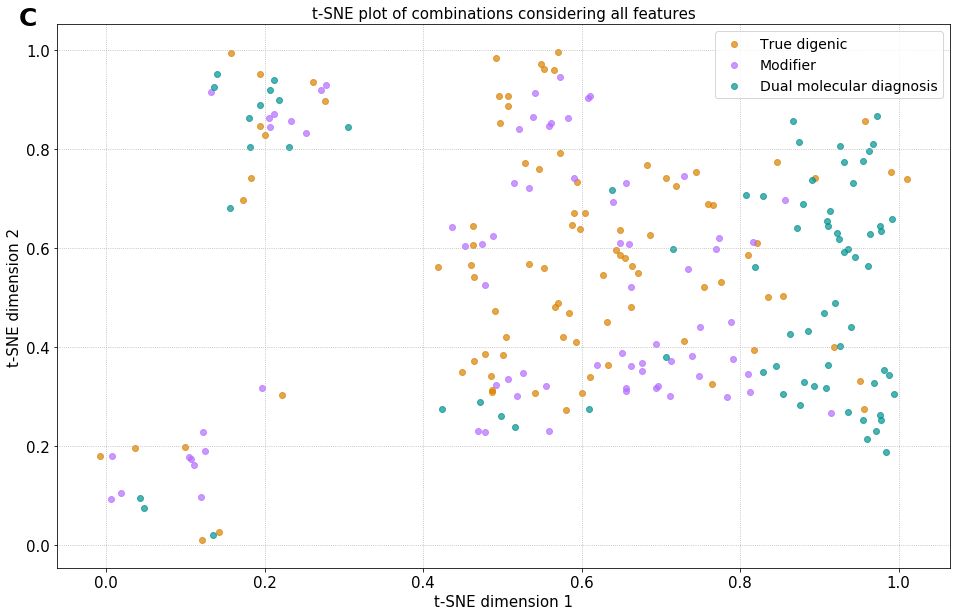

In [16]:
figure( figsize=(16, 10) )

text(-.11, 1.05, 'C', fontsize=25, weight='bold')

x_t, x_u, x_c, x_d = X_transform[y == "TD"], X_transform[y == "UK"], X_transform[y == "CO"], X_transform[y == "DD"]

scatter(x_t[:,0], x_t[:,1], marker="o", color=(219/255, 130/255, 0/255, 0.7), label="True digenic")
scatter(x_c[:,0], x_c[:,1], marker="o", color=(182/255, 109/255, 255/255, 0.7), label="Modifier")
#scatter(x_u[:,0], x_u[:,1], marker="o", color="silver", label="Unknown")
scatter(x_d[:,0], x_d[:,1], marker="o", color=(0/255, 146/255, 146/255, 0.7), label="Dual molecular diagnosis")

xlabel("t-SNE dimension 1", fontsize=15)
ylabel("t-SNE dimension 2", fontsize=15)

xticks(fontsize=15)
yticks(fontsize=15)

grid(linestyle=':')
legend(prop={'size': 14})

title('t-SNE plot of combinations considering all features', fontsize=15)

file_name = "vs_dual_diagnosis_all"
savefig("exports/2D_" + file_name + "_png.png", format='png', bbox_inches='tight')
savefig("exports/2D_" + file_name + "_eps.eps", format='eps', bbox_inches='tight')

In [9]:
X = dot(X, diag([1, 0, 0, 0, 1, 0, 0, 0, 1]))
X_transform = TSNE(n_components=2, init="pca").fit_transform(X)
X_transform = (X_transform - X_transform.min(axis=0)) / (X_transform.max(axis=0) - X_transform.min(axis=0))

X_transform += randn(len(X_transform), 2) / 80

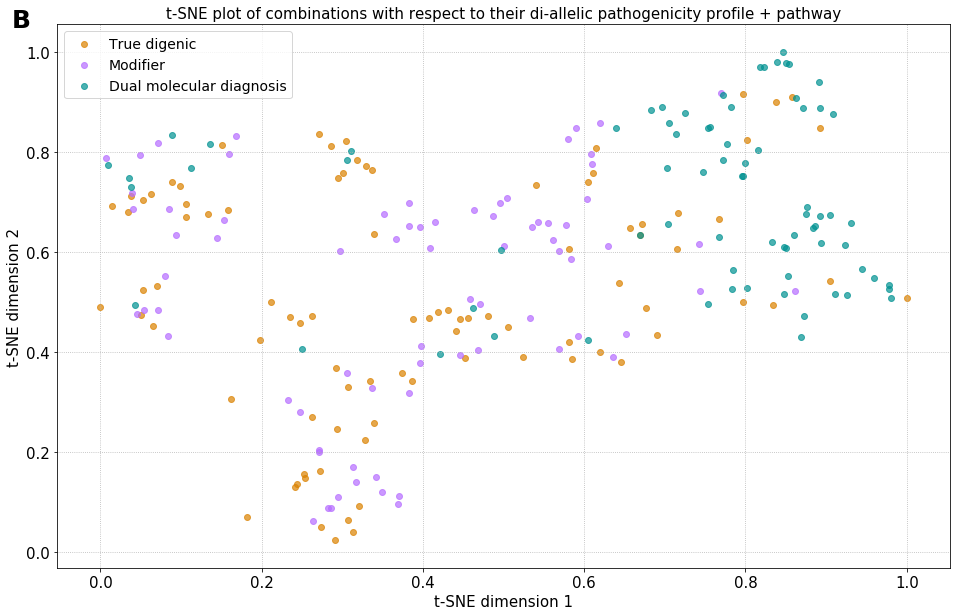

In [10]:
figure( figsize=(16, 10) )

text(-.11, 1.05, 'B', fontsize=25, weight='bold')

x_t, x_u, x_c, x_d = X_transform[y == "TD"], X_transform[y == "UK"], X_transform[y == "CO"], X_transform[y == "DD"]

scatter(x_t[:,0], x_t[:,1], marker="o", color=(219/255, 130/255, 0/255, 0.7), label="True digenic")
scatter(x_c[:,0], x_c[:,1], marker="o", color=(182/255, 109/255, 255/255, 0.7), label="Modifier")
#scatter(x_u[:,0], x_u[:,1], marker="o", color="silver", label="Unknown")
scatter(x_d[:,0], x_d[:,1], marker="o", color=(0/255, 146/255, 146/255, 0.7), label="Dual molecular diagnosis")

xlabel("t-SNE dimension 1", fontsize=15)
ylabel("t-SNE dimension 2", fontsize=15)

xticks(fontsize=15)
yticks(fontsize=15)

grid(linestyle=':')
legend(prop={'size': 14})

title('t-SNE plot of combinations with respect to their di-allelic pathogenicity profile + pathway', fontsize=15)

file_name = "vs_dual_diagnosis_cadd_path"
savefig("exports/2D_" + file_name + "_png.png", format='png', bbox_inches='tight')
savefig("exports/2D_" + file_name + "_eps.eps", format='eps', bbox_inches='tight')

In [21]:
# avoids the scrolling effect
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>